In [279]:
!pip install seaborn pandas

In [280]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [307]:
df = pd.read_csv("output.csv")
df

,experiment,type,threads,chunk,size,padding,time
0,0,static,1,0,67108864,0,456944.250992
1,1,static,1,0,67108864,0,404162.374008
2,2,static,1,0,67108864,0,377650.640991
3,3,static,1,0,67108864,0,419467.608017
4,4,static,1,0,67108864,0,428357.411011
...,...,...,...,...,...,...,...
3115,11,dynamic,256,2048,67108864,0,101525.889999
3116,12,dynamic,256,2048,67108864,0,95143.433990
3117,13,dynamic,256,2048,67108864,0,95219.084000
3118,14,dynamic,256,2048,67108864,0,98047.086014


# Plot by schedule type
Plot each schedule type and chunk size to get a feeling of how they behave.

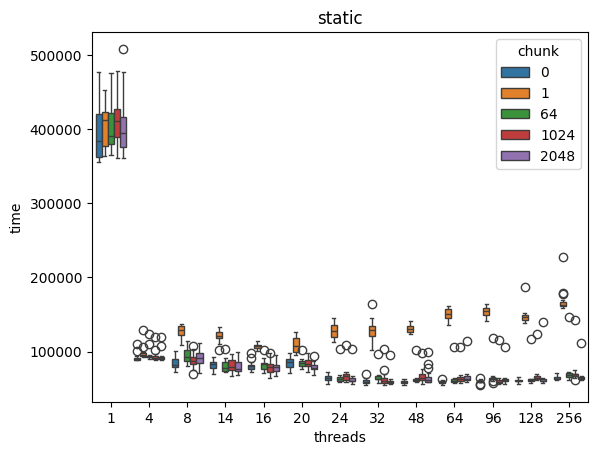

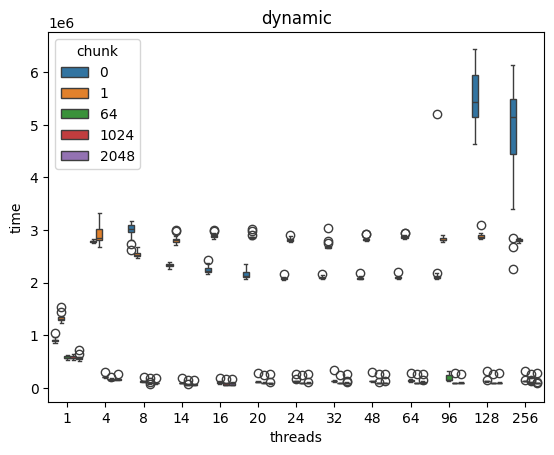

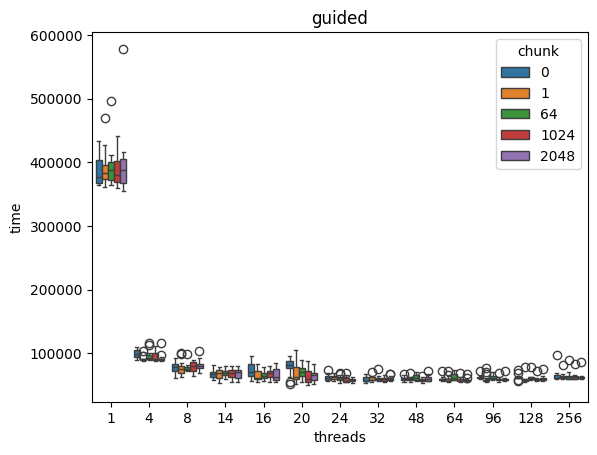

In [308]:
for type in ["static", "dynamic", "guided"]:
    plt.subplots()
    sns.boxplot(data=df[(df.type==type)], x="threads", y="time", hue='chunk', palette="tab10")
    plt.title(type)

# Plotting the best runs

In [309]:
# here we select the type/chunk/threads trio withg the fastest times
prefiltered = df[df.chunk > 0] # remove automatic selection
min_idx = prefiltered.groupby(["type", "chunk", "threads"]).mean()[['time']].groupby(["type"]).idxmin()
min_idx = min_idx.reset_index(drop=True)
min_idx[["type", "chunk", "threads"]] = pd.DataFrame(min_idx['time'].tolist(), index=min_idx.index)
min_idx = min_idx[["type", "chunk", "threads"]]
min_idx

,type,chunk,threads
0,dynamic,1024,14
1,guided,2048,64
2,static,2048,32


Text(0.5, 1.0, 'fastest run of each schedule type')

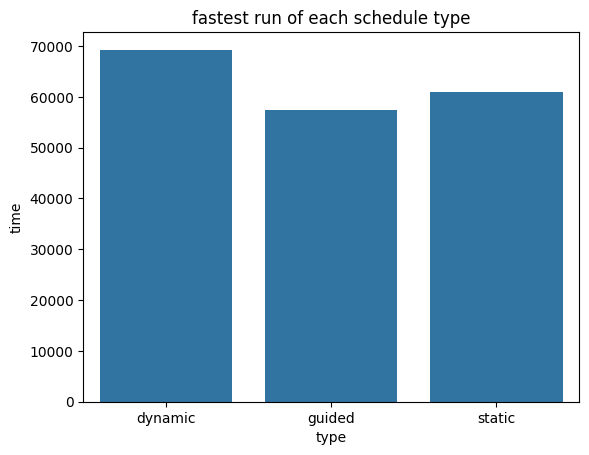

In [316]:
best = df.set_index(['type', 'chunk', 'threads']).join(min_idx.set_index(['type', 'chunk', 'threads']), rsuffix='_', how="inner").reset_index()
best = best.groupby("type").mean()['time'] # best is the average of the fastest chunk/threads combination

sns.barplot(best)
plt.title("fastest run of each schedule type")
# plt.ylim(best.min()*0.95, best.max() * 1.05)

        type  chunk  experiment  threads      size  padding           time  \
0     static   2048           0        1  67108864        0  477646.210999   
1     static   2048           1        1  67108864        0  404283.343002   
2     static   2048           2        1  67108864        0  414117.966995   
3     static   2048           3        1  67108864        0  508114.669998   
4     static   2048           4        1  67108864        0  366874.119995   
..       ...    ...         ...      ...       ...      ...            ...   
619  dynamic   1024          11      256  67108864        0   96359.304993   
620  dynamic   1024          12      256  67108864        0   95874.753998   
621  dynamic   1024          13      256  67108864        0   98769.257980   
622  dynamic   1024          14      256  67108864        0  100379.550995   
623  dynamic   1024          15      256  67108864        0  109602.915985   

     threads_  
0          32  
1          32  
2          32  

Text(0.5, 1.0, 'time vs threads for the best chunk size')

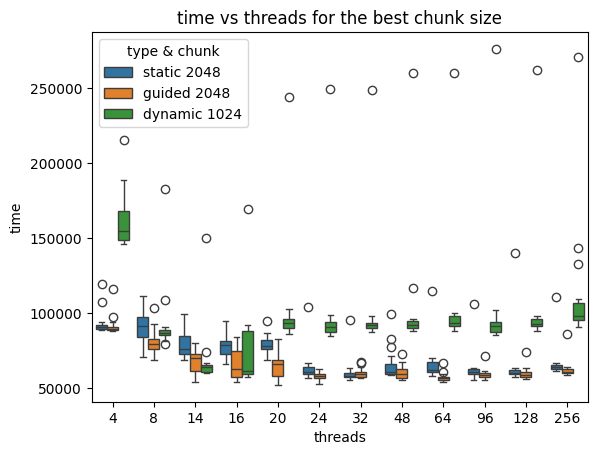

In [320]:
best = df.set_index(['type', 'chunk']).join(min_idx.set_index(['type', 'chunk']), rsuffix='_', how="inner").reset_index()
print(best)

best['type & chunk'] = best['type'] + " " + best['chunk'].astype(str)
sns.boxplot(data=best[(best.threads>1)], x="threads", y="time", hue='type & chunk')
plt.title("time vs threads for the best chunk size")